<a href="https://www.kaggle.com/code/sondosaabed/predict-raintmrr-lr-svm-ann?scriptVersionId=182826980" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Project 2 for Machine Learning Course by Dr. Radi Jarrar, 
## Classification task for Weather Dataset 
Sondos Aabed

In [1]:
#Import necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

## Read the Weather dataset file

In [2]:
def read_file(name):
    dataframe = pd.read_csv(name) # Load the excel file into a data Structure
    print("Observations: ", len(dataframe))  # check the size of obsevations
    print("Features: ", dataframe.columns.size) # check number of features
    return dataframe

In [3]:
dataframe = read_file('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')

Observations:  145460
Features:  23


In [4]:
dataframe.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
dataframe.describe(include=['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2017-06-18,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [6]:
# high cardinality of date needs to be handeled
def handle_date(dataframe):
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])
    dataframe['Year'] = dataframe['Date'].dt.year
    dataframe['Year'].head()
    dataframe['Month'] = dataframe['Date'].dt.month
    dataframe['Month'].head()
    dataframe['Day'] = dataframe['Date'].dt.month
    dataframe['Day'].head()
    dataframe.drop('Date', axis=1, inplace = True)

In [7]:
handle_date(dataframe)
dataframe.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,12
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,12
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,12
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,12
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,12


## Chapter one: Eploratory Data Analysis (EDA)

### Features Overview

- draw histograms for quantitative features

In [8]:
def histograms(dataframe):
    """
    Plots histograms of numerical columns in the dataframe in a grid layout.

    Args:
      dataframe: A pandas DataFrame containing the data.
    """
    fixed_bins_cols = ['Cloud3pm', 'Cloud9am']
    fixed_bins_fig, fixed_bins_axes = plt.subplots(1, len(fixed_bins_cols), figsize=(20, 6))  # Adjust figsize as needed

    for i, col in enumerate(fixed_bins_cols):
        fixed_bins_axes[i].hist(dataframe[col], bins=15, color='orange')
        fixed_bins_axes[i].set_xlabel(col)
        fixed_bins_axes[i].set_ylabel('Count')

    dynamic_bins_cols = [col for col in dataframe if col not in fixed_bins_cols and dataframe[col].dtype != object]  # Filter numerical columns
    n_rows = int(np.ceil(len(dynamic_bins_cols) / 3))  # Calculate number of rows for grid
    dynamic_bins_fig, dynamic_bins_axes = plt.subplots(n_rows, 3, figsize=(20, n_rows * 6))  # Adjust figsize as needed

    for i, col in enumerate(dynamic_bins_cols):
        row, col_index = divmod(i, 3)  # Get row and column index for grid placement
        dynamic_bins_axes[row, col_index].hist(dataframe[col], bins=int(np.sqrt(len(dataframe))), color='orange')  # Dynamic bin size
        dynamic_bins_axes[row, col_index].set_xlabel(col)
        dynamic_bins_axes[row, col_index].set_ylabel('Count')

    plt.tight_layout()

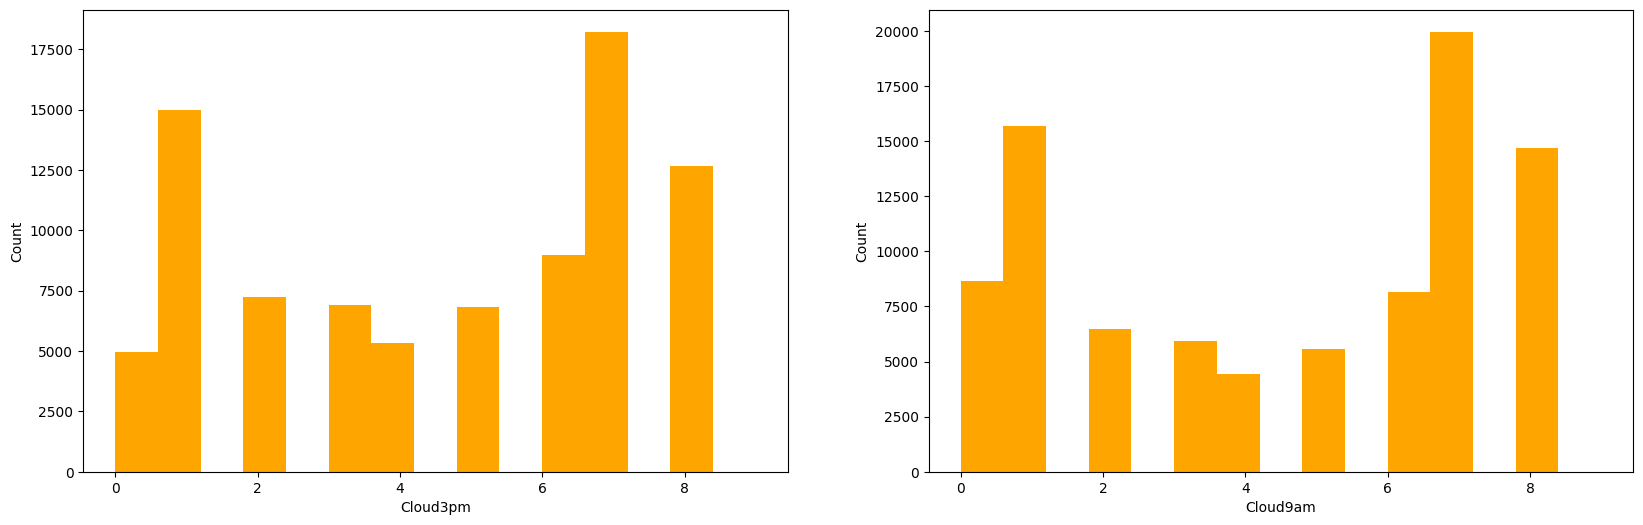

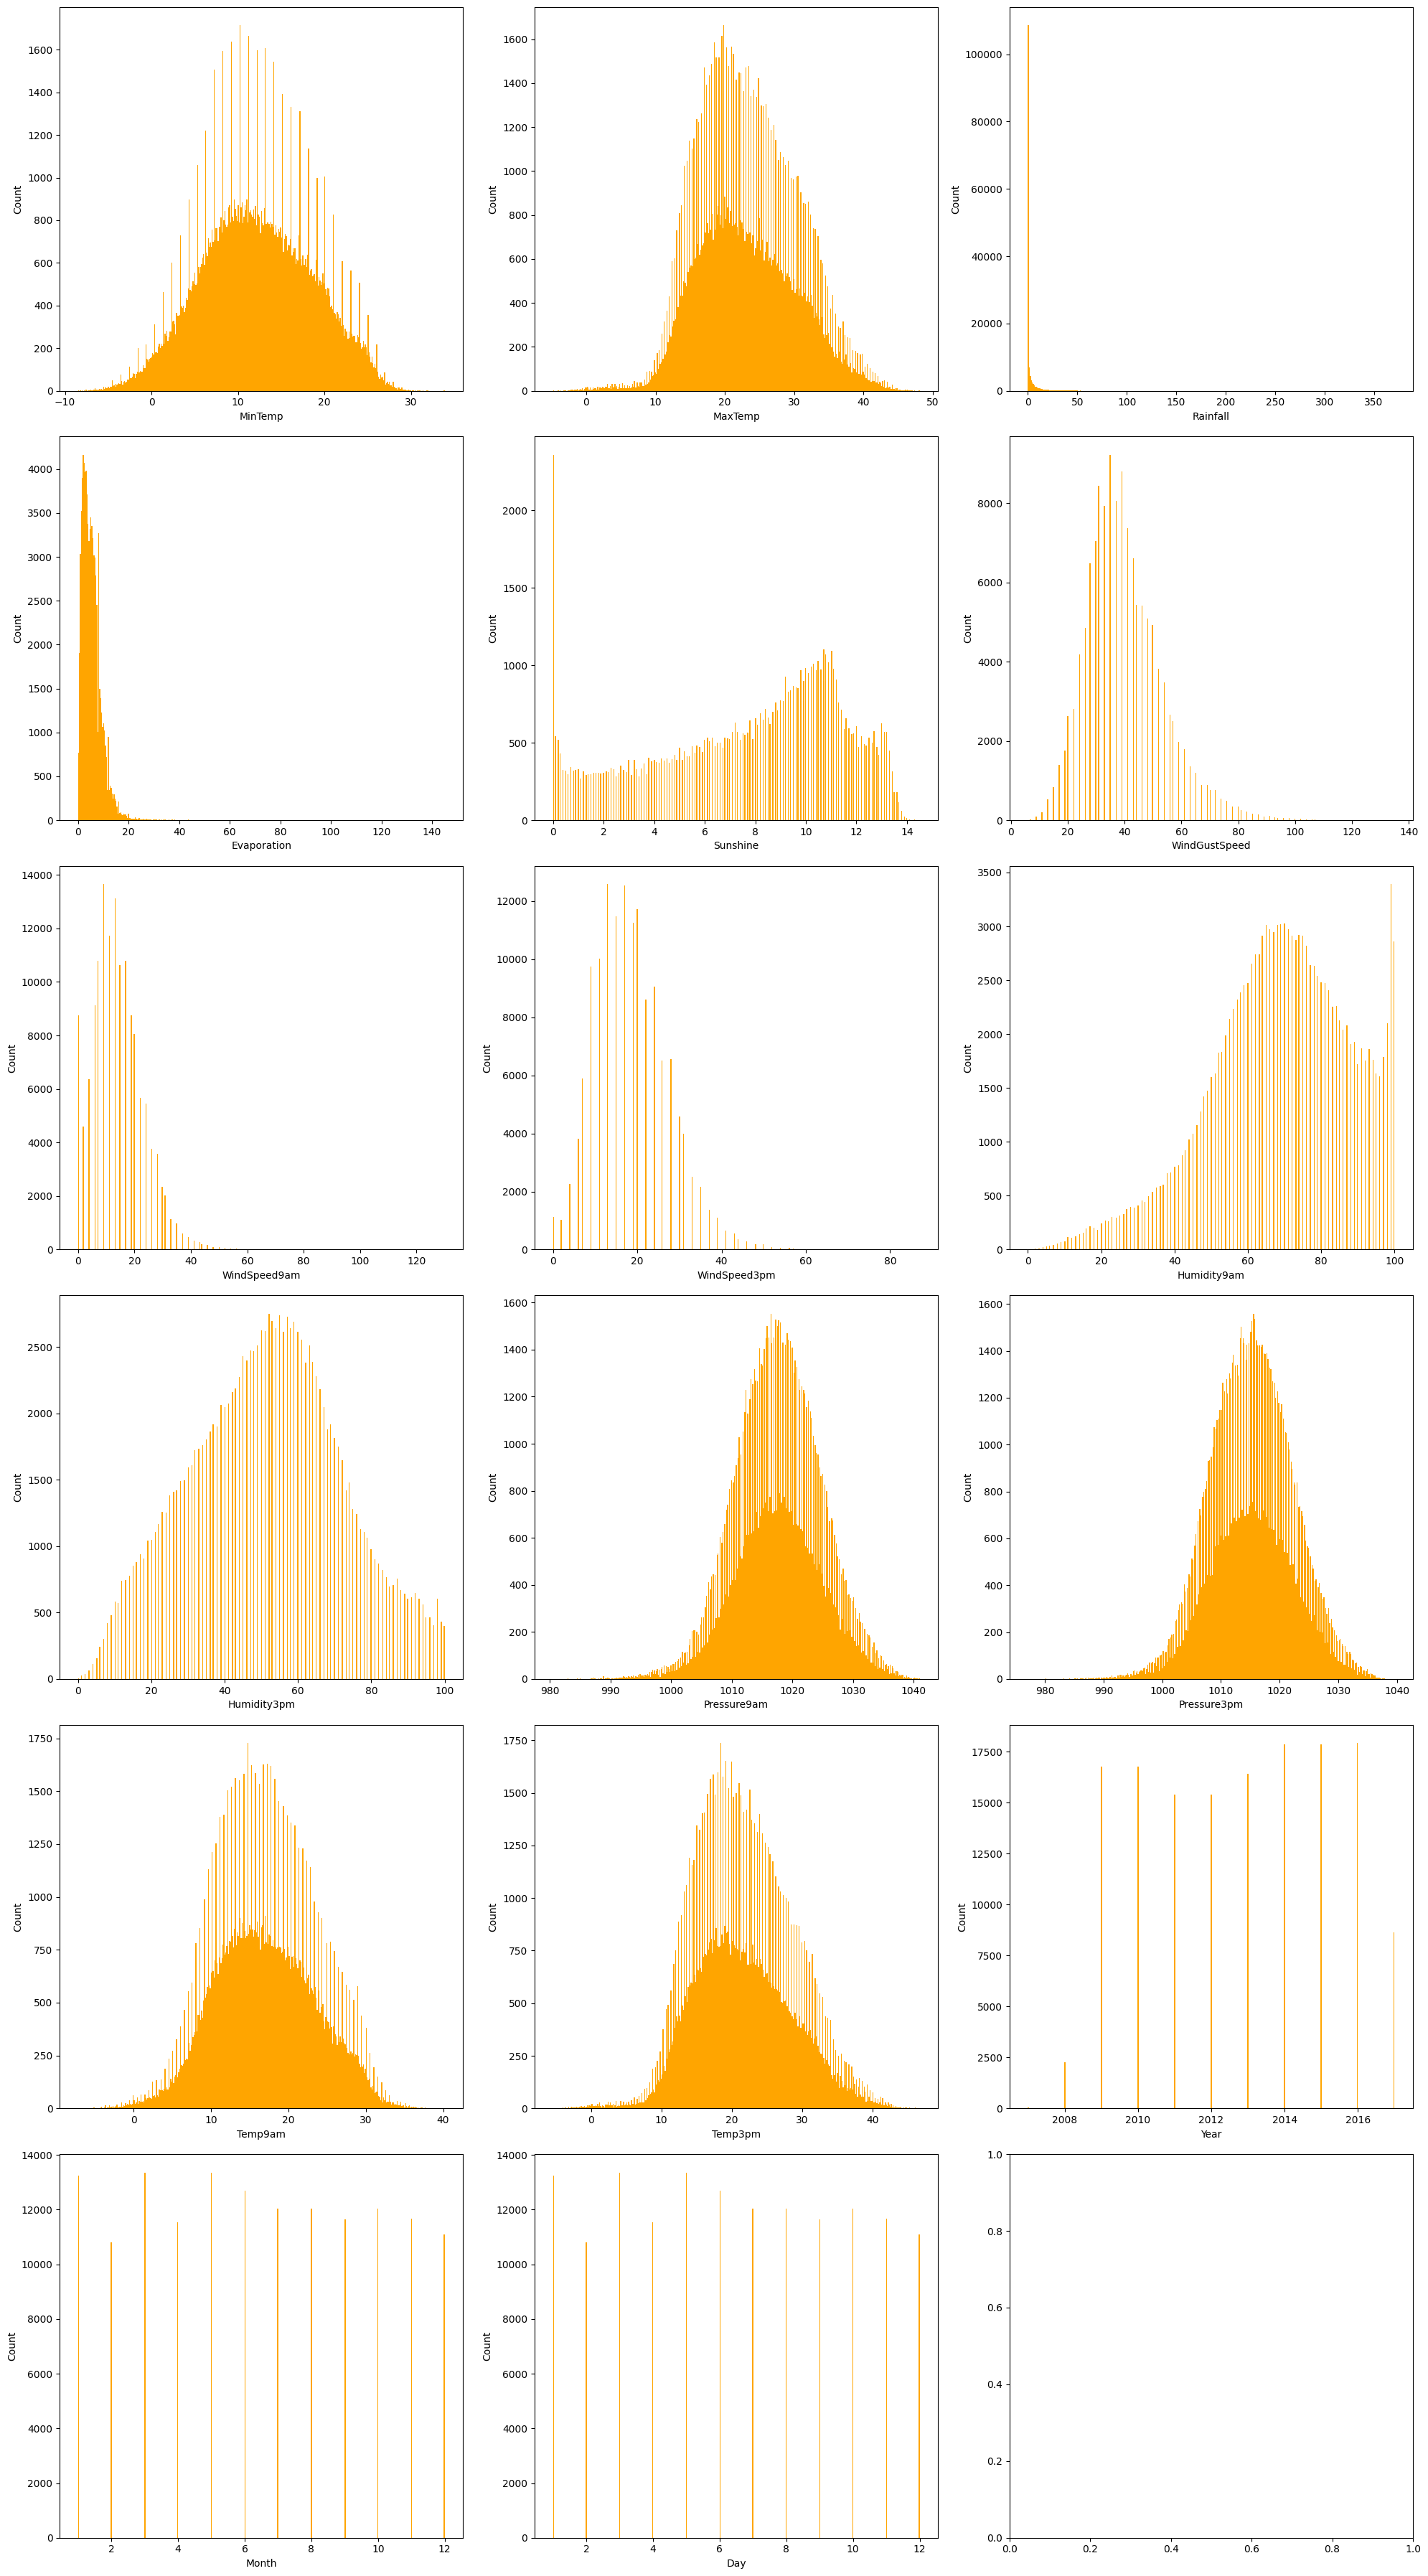

In [9]:
histograms(dataframe)

- draw pie Chart for qualitative features

In [10]:
def pies(dataframe, cols_per_row=3, figsize=(15, 10)):  # Added cols_per_row and figsize arguments
    """
    Plots pie charts for categorical columns in the dataframe in a grid layout.

    Args:
      dataframe: A pandas DataFrame containing the data.
      cols_per_row: Number of columns per row in the grid layout (default: 3).
      figsize: Figure size for the overall plot (default: (15, 10)).
    """

    qualitative_cols = [col for col in dataframe if dataframe[col].dtype == object]  # Filter categorical columns
    n_rows = int(np.ceil(len(qualitative_cols) / cols_per_row))  # Calculate number of rows for grid

    fig, axes = plt.subplots(n_rows, cols_per_row, figsize=figsize)  # Create grid of axes

    for i, col in enumerate(qualitative_cols):
        row, col_index = divmod(i, cols_per_row)  # Get row and column index for grid placement

        # Ensure proper handling of single-row and single-column grids
        if n_rows == 1:
            axes[col_index].pie(dataframe[col].value_counts(), autopct='%1.1f%%', labels=None)  # Omit labels for single row
            axes[col_index].set_title(col)
        elif cols_per_row == 1:
            axes[row].pie(dataframe[col].value_counts(), autopct='%1.1f%%', labels=None)  # Omit labels for single column
            axes[row].set_title(col)
        else:
            axes[row, col_index].pie(dataframe[col].value_counts(), autopct='%1.1f%%')
            axes[row, col_index].set_title(col)

    plt.tight_layout()

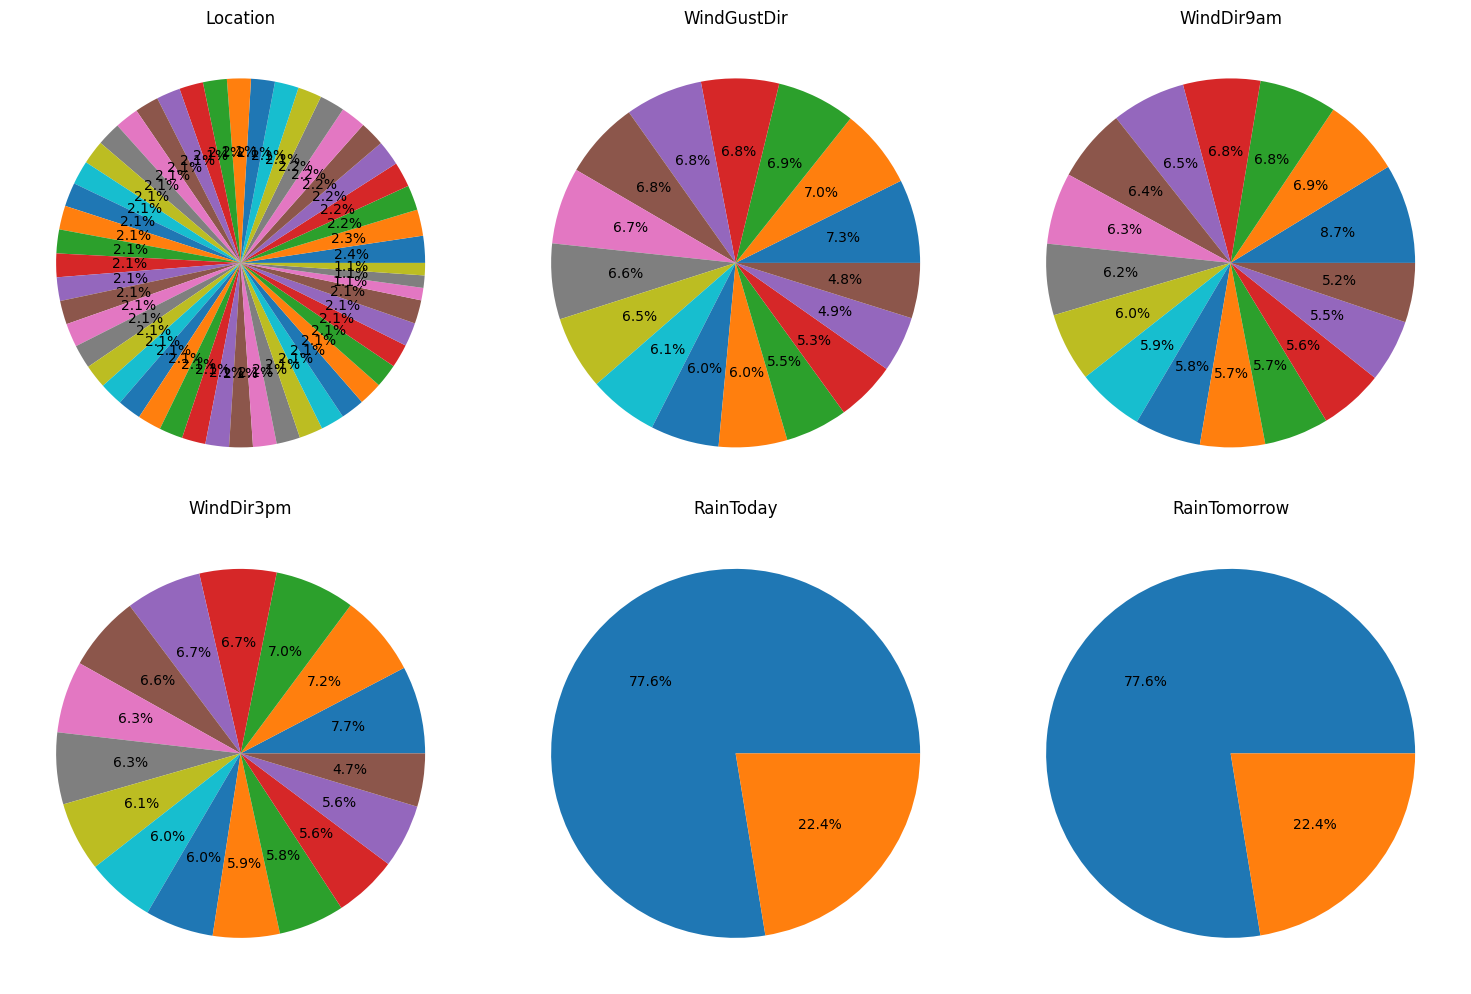

In [11]:
pies(dataframe)

## Data Cleansing

- draw box plots to detect outliers

In [12]:
def boxPlot(dataframe):
    # Filter numeric columns
    numeric_cols = [col for col in dataframe if dataframe[col].dtype != object and dataframe[col].dtype != '<M8[ns]']
    num_plots = len(numeric_cols)
    grid_size = int(num_plots**0.5) + (1 if num_plots % int(num_plots**0.5) != 0 else 0)
    
    # Create a grid of subplots
    fig, axes = plt.subplots(nrows=grid_size, ncols=grid_size, figsize=(15, 15))
    axes = axes.flatten()
    
    for i, col in enumerate(numeric_cols):
        sns.boxplot(dataframe[col], ax=axes[i])
        axes[i].set_title(col)
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

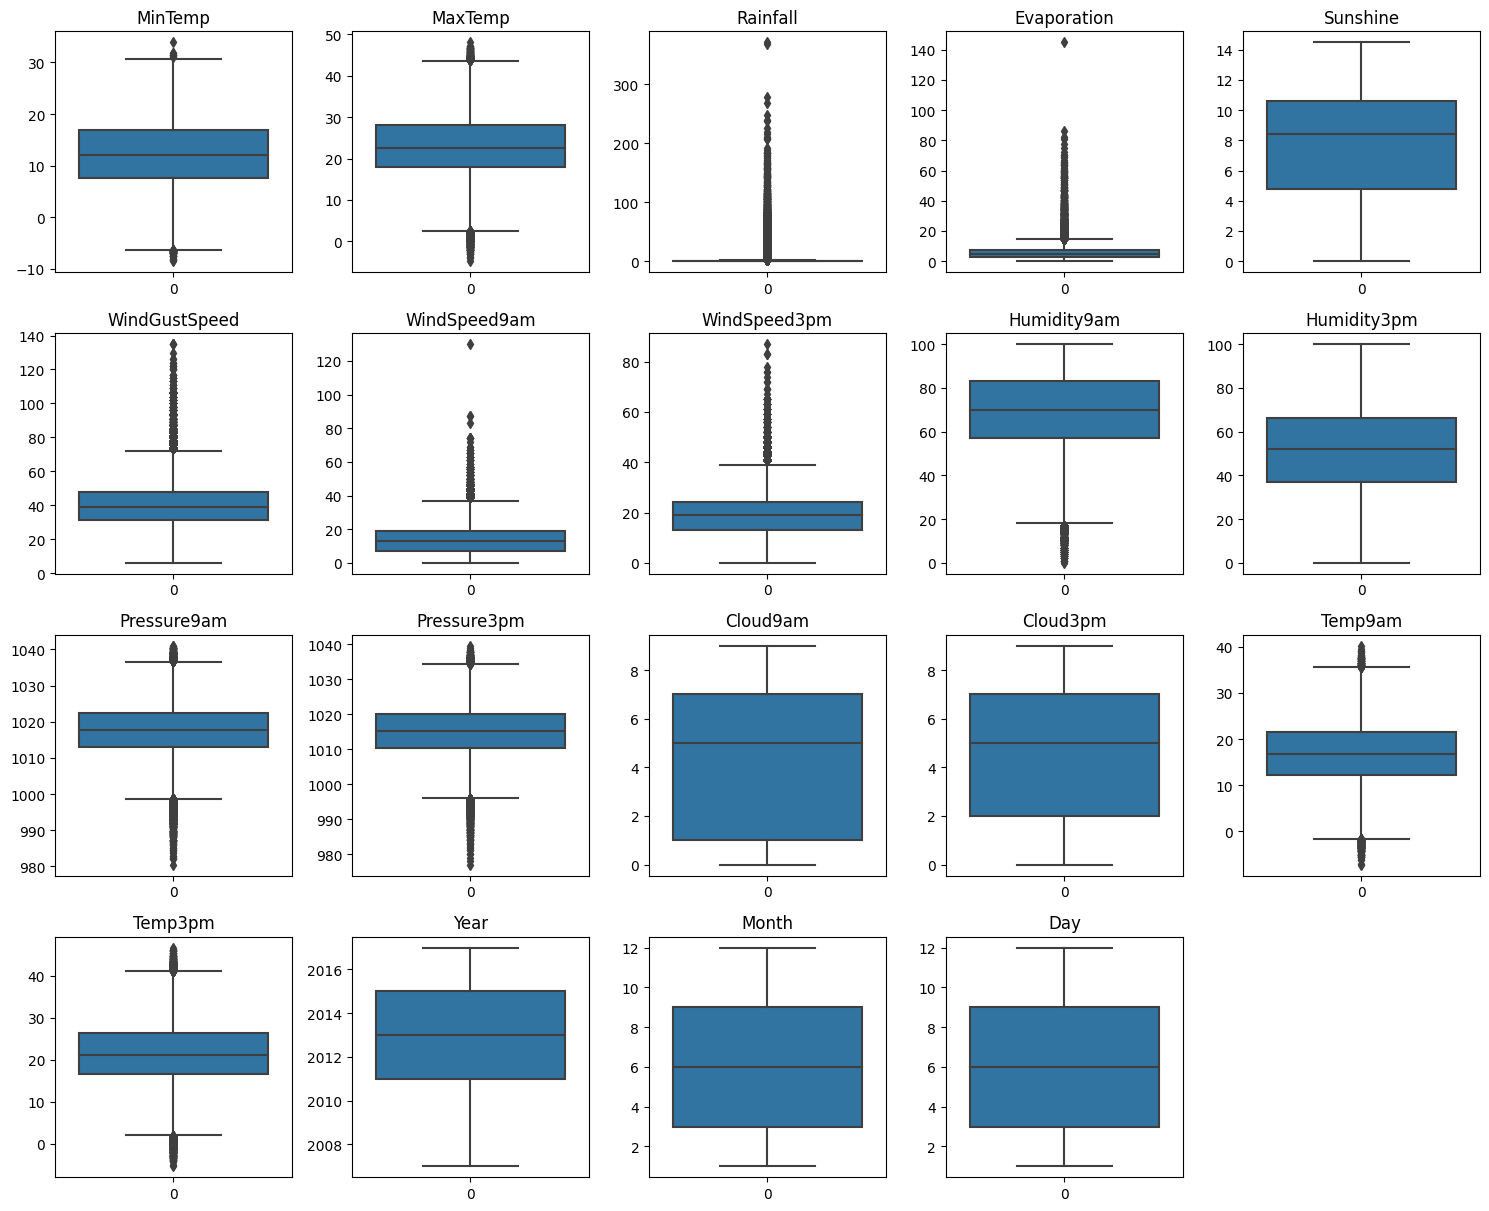

In [13]:
boxPlot(dataframe) 

- draw scatter plot to detect outliers

In [14]:
def scatterPlot(dataframe,col):
    figure, axes = plt.subplots(figsize=(8, 5))
    sns.scatterplot(dataframe[col],ax=axes)
    axes.set_title(col)

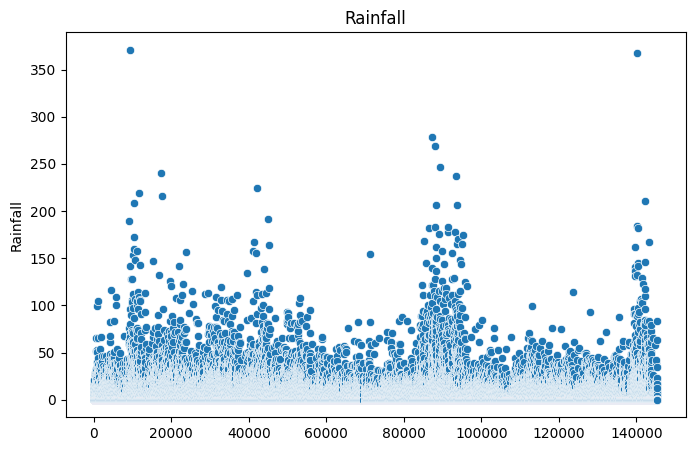

In [15]:
scatterPlot(dataframe,'Rainfall')

- use KNN to impute missing values

In [16]:
def impute_KNN(df):
    imputer = KNNImputer(n_neighbors=10)
    imputed = imputer.fit_transform(df)
    df_imputed = pd.DataFrame(imputed, columns=df.columns)
    return df_imputed

- this method returns the lower and the upper bound of a feature

In [17]:
def find_outliers(dataframe, col):
    q1 = dataframe[col].quantile(0.25)
    q3 =dataframe[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    return [lower_bound,upper_bound]

- this method imputes qualitative missing data and convert them to numerical

In [18]:
def impute_and_convert(dataframe):
    for col in dataframe.columns:
        if dataframe[col].dtype == 'object':
            # impute missing values with the mode of the column
            dataframe[col].fillna(dataframe[col].mode()[0], inplace=True)
            # convert column to numerical representation
            dataframe.loc[:, col] = dataframe[col].astype('category').cat.codes
    return dataframe

In [19]:
def clean_data(dataframe):
    # remove duplicate rows
    dataframe=dataframe.drop_duplicates()

    # convert non-numerical values to numerical
    dataframe= impute_and_convert(dataframe)

    # fill in the missing data with KNN
#     dataframe= impute_KNN(dataframe)
    ## instead of filling let's just drop NAN
    dataframe.dropna(inplace=True)
    # these features were detected to have outliers using EDA
    outliers=['Rainfall','WindSpeed3pm','WindGustSpeed','WindSpeed9am','Humidity9am','Pressure3pm','Pressure9am','Temp3pm','Temp9am','MaxTemp']
    # handle outliers
    for col in outliers:
        outliers_bounds = find_outliers(dataframe,col)
        dataframe[col]=np.where(dataframe[col]>outliers_bounds[1],outliers_bounds[1],np.where(dataframe[col]<outliers_bounds[0],outliers_bounds[0],dataframe[col]))
    # return cleansed datadrame
    return dataframe

In [20]:
dataframe=clean_data(dataframe)
dataframe.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000
mean,13.335368,24.122936,0.384214,5.442443,7.694000,40.363160,15.141038,19.507384,66.298226,49.709698,1017.350161,1014.893449,4.250824,4.330964,18.078949,22.622406,2012.218164,6.411189,6.411189
std,6.465612,6.973724,0.609743,3.690139,3.766318,12.725026,8.225336,8.316102,18.422236,20.212989,6.856100,6.832374,2.802908,2.649844,6.603741,6.834186,2.447629,3.425273,3.425273
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,17.500000,0.000000,998.750000,996.000000,0.000000,0.000000,-0.900000,3.700000,2007.000000,1.000000,1.000000
25%,8.400000,18.600000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,36.000000,1012.700000,1010.100000,1.000000,2.000000,12.900000,17.300000,2010.000000,3.000000,3.000000
50%,13.100000,23.800000,0.000000,4.800000,8.600000,39.000000,15.000000,19.000000,67.000000,51.000000,1017.300000,1014.800000,5.000000,5.000000,17.700000,22.300000,2012.000000,6.000000,6.000000
75%,18.300000,29.600000,0.600000,7.400000,10.700000,48.000000,20.000000,24.000000,80.000000,63.000000,1022.000000,1019.500000,7.000000,7.000000,23.200000,27.800000,2014.000000,9.000000,9.000000
max,31.400000,46.100000,1.500000,81.200000,14.500000,73.500000,36.500000,40.500000,100.000000,100.000000,1035.950000,1033.600000,8.000000,9.000000,38.650000,43.550000,2017.000000,12.000000,12.000000


- feature scaling using minmax

In [21]:
def min_max(dataframe):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(dataframe)
    return pd.DataFrame(scaled, columns=dataframe.columns)

In [22]:
dataframeScaled = min_max(dataframe)
dataframeScaled.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
count,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,...,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000,58236.000000
mean,0.498724,0.525863,0.476737,0.256143,0.067025,0.530621,0.499056,0.486251,0.467686,0.505543,...,0.502485,0.531353,0.481218,0.479872,0.474841,0.220156,0.218576,0.521816,0.491926,0.491926
std,0.284546,0.169701,0.166041,0.406495,0.045445,0.259746,0.319510,0.197287,0.309804,0.313638,...,0.181712,0.350363,0.294427,0.166972,0.171498,0.414355,0.413284,0.244763,0.311388,0.311388
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.266667,0.396325,0.345238,0.000000,0.034483,0.344828,0.200000,0.341085,0.200000,0.200000,...,0.375000,0.125000,0.222222,0.348925,0.341280,0.000000,0.000000,0.300000,0.181818,0.181818
50%,0.533333,0.519685,0.469048,0.000000,0.059113,0.593103,0.533333,0.465116,0.466667,0.533333,...,0.500000,0.625000,0.555556,0.470291,0.466750,0.000000,0.000000,0.500000,0.454545,0.454545
75%,0.755556,0.656168,0.607143,0.400000,0.091133,0.737931,0.800000,0.604651,0.733333,0.800000,...,0.625000,0.875000,0.777778,0.609355,0.604768,0.000000,0.000000,0.700000,0.727273,0.727273
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Coralaation

- draw heat map to check data corelation

In [23]:
def heatMap(dataframe):
    plt.figure(figsize=(16, 10))
    heatmap = sns.heatmap(dataframe.corr(), annot=True, fmt='.2f', linecolor='grey', annot_kws={"size": 8})
    cbar = heatmap.collections[0].colorbar
    cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
    cbar.set_ticklabels(['-1', '-0.5', '0', '0.5', '1'])
    plt.title('Correlation Heatmap', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()

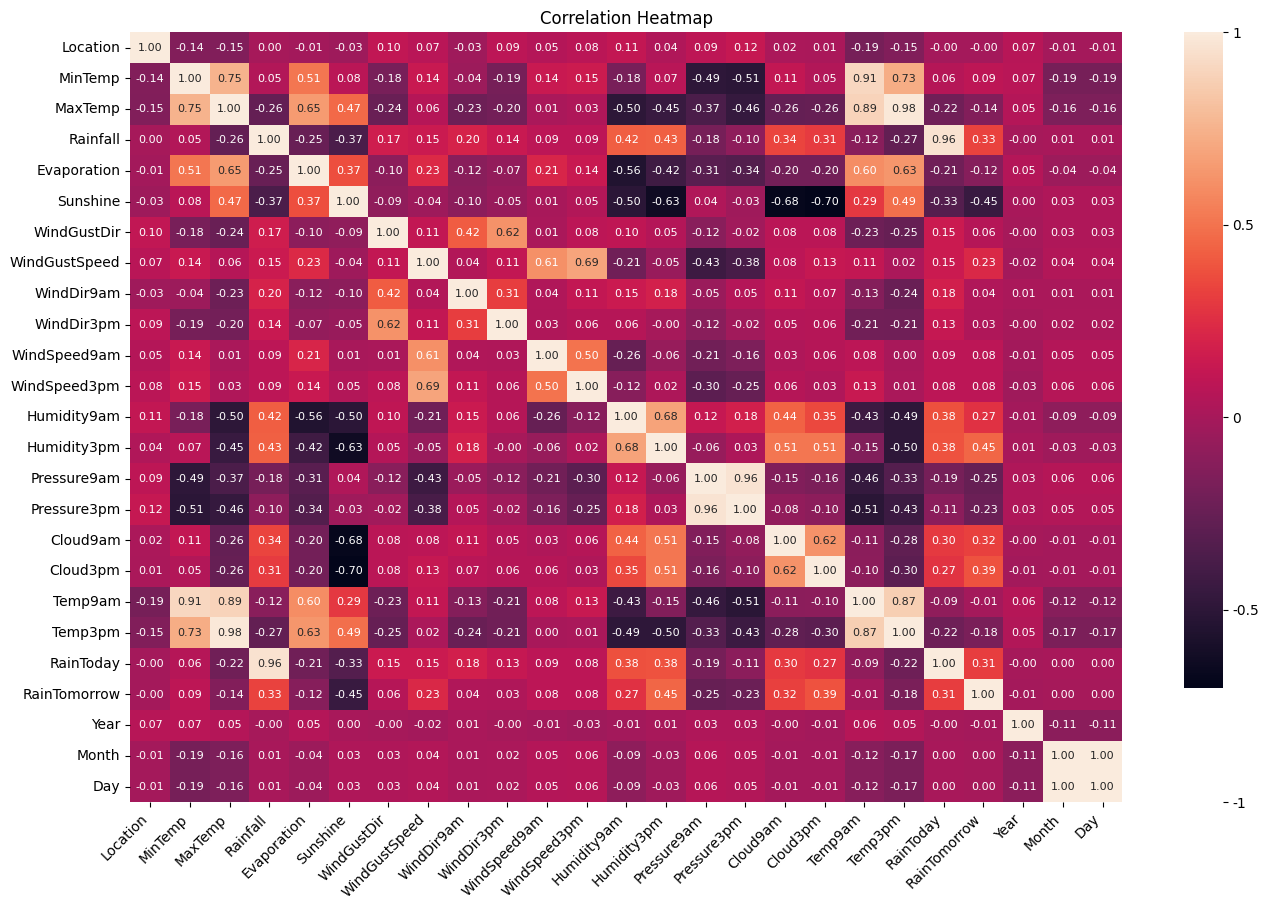

In [24]:
heatMap(dataframeScaled)

- based in the correlation between features

In [25]:
def select_features(dataframe):
    dataframe= dataframe[['Month', 'Location','MinTemp','MaxTemp','Humidity9am','Humidity3pm','WindGustSpeed','WindDir9am','WindDir3pm','Cloud9am','Cloud3pm','RainTomorrow','RainToday']]
    return dataframe

In [26]:
dataframeScaled= select_features(dataframeScaled)
dataframeScaled.head()

,Month,Location,MinTemp,MaxTemp,Humidity9am,Humidity3pm,WindGustSpeed,WindDir9am,WindDir3pm,Cloud9am,Cloud3pm,RainTomorrow,RainToday
0,0.0,0.155556,0.645669,0.740476,0.030303,0.13,0.604651,0.066667,0.800000,0.250,0.555556,0.0,0.0
1,0.0,0.155556,0.658793,0.590476,0.151515,0.08,0.434109,0.666667,0.666667,0.125,0.111111,0.0,0.0
2,0.0,0.155556,0.685039,0.797619,0.296970,0.22,0.573643,0.333333,0.400000,0.125,0.666667,0.0,0.0
3,0.0,0.155556,0.750656,0.816667,0.236364,0.22,0.341085,0.933333,1.000000,0.125,0.555556,0.0,0.0
4,0.0,0.155556,0.811024,0.878571,0.018182,0.15,0.403101,0.466667,0.933333,0.125,0.666667,0.0,0.0


- split the data and drop the target feature

In [27]:
X = dataframeScaled.drop(['RainTomorrow'], axis=1)
Y = dataframeScaled['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

## Chapter two: Classification Algorithms


this function is used to return performance measure for the model three models will be passed through this function are:

- SVC()
- MLPClassifier()
- LogisticRegression()

In [28]:
def evaluate_model(model, x_test, y_test, X_train, Y_train):
    if isinstance(model, SVC):
        model = SVC(probability=True)
    
    if isinstance(model, MLPClassifier):
        model = MLPClassifier(max_iter=1000)

    # Calculate accuracy measurments
    model.fit(X_train, Y_train)
    y_pred = model.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    # Calculate auc
    y_pred_proba = model.predict_proba(x_test)[::,1]
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # confussion matrix
    confusionMatrix = metrics.confusion_matrix(y_test, y_pred)
    return [ accuracy, precision, recall, f1, auc, confusionMatrix ]

- Evaluation returned array content: accuracy, precision, recall, f1, auc, confusionMatrix

- cross validation and plot learning curve

In [29]:
def cv_learnCurve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
    figure, axes = plt.subplots()
    axes.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
    axes.plot(train_sizes, test_scores.mean(axis=1), label='Test score')
    axes.set_xlabel('Training examples')
    axes.set_ylabel('Score')
    axes.legend(loc='best')

- Train & evaluate logetsic regression model and get predictions

Logestic regression Model Results:  [0.8480425824175825, 0.7202072538860104, 0.493491124260355, 0.5856741573033708, 0.869614965810595, array([[8627,  486],
       [1284, 1251]])]


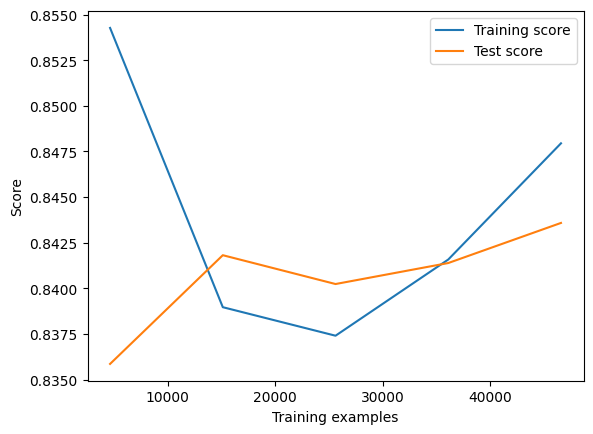

In [30]:
lr_results = evaluate_model(LogisticRegression(), X_test, y_test, X_train, y_train)
print("Logestic regression Model Results: ", lr_results)
cv_learnCurve(LogisticRegression(),X, Y)

- Train and evaluate ANN model and get predictions

ANN Model Results:  [0.8564560439560439, 0.7675139491630503, 0.4883629191321499, 0.5969141755062681, 0.8799019801999485, array([[8738,  375],
       [1297, 1238]])]


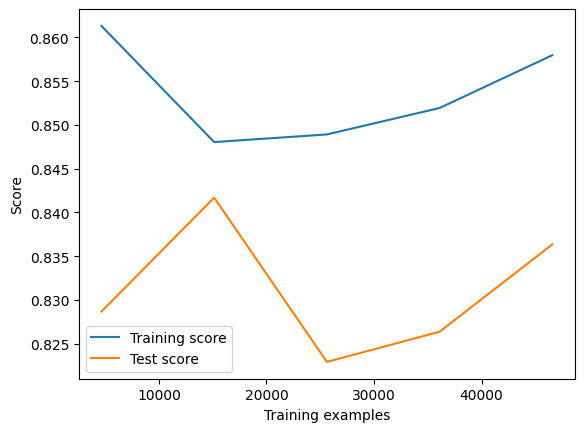

In [31]:
ann_results = evaluate_model(MLPClassifier(), X_test, y_test, X_train, y_train)
print("ANN Model Results: ", ann_results)
cv_learnCurve(MLPClassifier(),X, Y)

- Train & evaluate SVM model and get predictions

SVM Model Results:  [0.8531936813186813, 0.7831159917638985, 0.45009861932938855, 0.5716432865731463, 0.8290814582890993, array([[8797,  316],
       [1394, 1141]])]


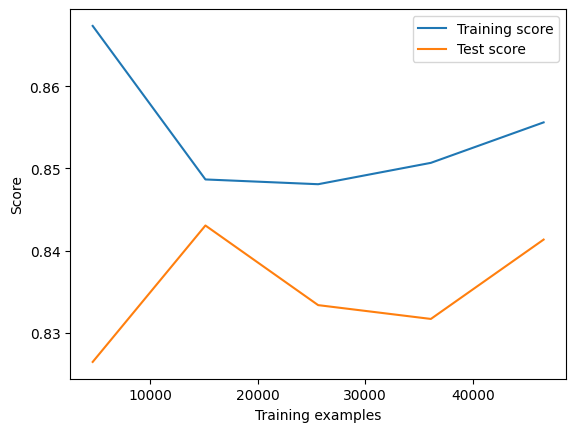

In [32]:
svm_results = evaluate_model(SVC(), X_test, y_test, X_train, y_train)
print("SVM Model Results: ", svm_results)
cv_learnCurve(SVC(),X, Y)